In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

In [3]:
from keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step


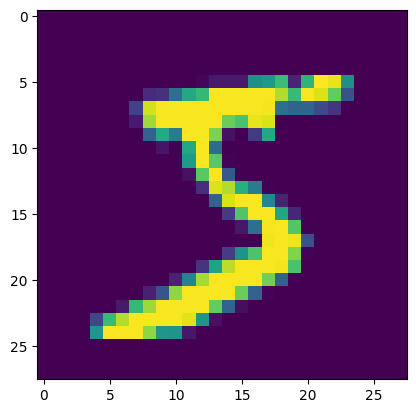

In [5]:
plt.imshow(X_train[0])

In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [7]:
X_train.shape

(60000, 784)

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [14]:
def classification_model():
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [16]:
model = classification_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/10
1875/1875 - 24s - 13ms/step - accuracy: 0.9446 - loss: 0.1838 - val_accuracy: 0.9743 - val_loss: 0.0860
Epoch 2/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9758 - loss: 0.0774 - val_accuracy: 0.9758 - val_loss: 0.0758
Epoch 3/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9833 - loss: 0.0526 - val_accuracy: 0.9745 - val_loss: 0.0833
Epoch 4/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9870 - loss: 0.0397 - val_accuracy: 0.9804 - val_loss: 0.0699
Epoch 5/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9901 - loss: 0.0308 - val_accuracy: 0.9826 - val_loss: 0.0599
Epoch 6/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9913 - loss: 0.0258 - val_accuracy: 0.9800 - val_loss: 0.0736
Epoch 7/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9930 - loss: 0.0224 - val_accuracy: 0.9806 - val_loss: 0.0790
Epoch 8/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9936 - loss: 0.0198 - val_accuracy: 0.9809 - val_loss: 0.0839
Epoch 9/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9951 - loss: 0.0154 - val_a

In [18]:
print(f"Accuracy: {scores[1]}\nError: {1-scores[1]}")

Accuracy: 0.980400025844574
Error: 0.019599974155426025


In [19]:
scores

[0.09412733465433121, 0.980400025844574]

In [20]:
model.save('classification_model.keras')

In [21]:
pretrained_model = keras.saving.load_model('classification_model.keras')

In [22]:
pretrained_model

<Sequential name=sequential_1, built=True>